### map for figure 5, Anderson et al. (2025)

In [3]:
# install and load packages
#!pip install cartopy
#!pip install matplotlib geopandas shapely
#!pip install netCDF4
# restart kernal after installs

import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import netCDF4 as nc

#to list all available modules:
#help("modules")

In [4]:
# open NOAA 2023 global annual nitrate data (1 degree resolution)
# downloaded locally from 'https://www.ncei.noaa.gov/data/oceans/archive/arc0218/0270533/2.2/data/0-data/nitrate/all/1.00/woa23_all_n00_01.nc'
# The correct file is the annual nitrate statistics with a one-degree grid resolution ('woa23_all_n00_01.nc')
path = '../../../ocean/projects/ees240003p/hannaand/hannaand/tricho/woa23_all_n00_01.nc'

# Open the file using xarray
nit = xr.open_dataset(path, decode_times=False)
nit

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 3.894e+03
Dimensions without coordinates: nbounds
Data variables: (12/13)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    n_an                (time, depth, lat, lon) float32 ...
    ...                  ...
    n_dd                (time, depth, lat, lon) float64 ...
    n_sd                (time, depth, lat, lon) float32 ...
    n_se                (time, depth, lat, lon) float32 ...
    n_oa                (time, depth, lat, lon) float32 ...
    n_gp                (time, depth, lat, lon) float64 ...
    n_sea               (time, depth, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : moles_of_nitrat...
    summary:                         
    references:                      Paver, C.R., H.E. Garcia, C. Bouchard, S...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2023-09-30 
    date_modified:                   2023-09-30

In [5]:
#convert xarray file to df
df = nit.to_dataframe().reset_index()
df

,lat,nbounds,lon,depth,time,crs,lat_bnds,lon_bnds,depth_bnds,climatology_bounds,n_an,n_mn,n_dd,n_sd,n_se,n_oa,n_gp,n_sea
0,-89.5,0,-179.5,0.0,3894.0,-2147483647,-90.0,-180.0,0.0,3552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.5,0,-179.5,5.0,3894.0,-2147483647,-90.0,-180.0,2.5,3552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.5,0,-179.5,10.0,3894.0,-2147483647,-90.0,-180.0,7.5,3552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-89.5,0,-179.5,15.0,3894.0,-2147483647,-90.0,-180.0,12.5,3552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-89.5,0,-179.5,20.0,3894.0,-2147483647,-90.0,-180.0,17.5,3552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219195,89.5,1,179.5,5100.0,3894.0,-2147483647,90.0,180.0,5150.0,4248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13219196,89.5,1,179.5,5200.0,3894.0,-2147483647,90.0,180.0,5250.0,4248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13219197,89.5,1,179.5,5300.0,3894.0,-2147483647,90.0,180.0,5350.0,4248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13219198,89.5,1,179.5,5400.0,3894.0,-2147483647,90.0,180.0,5450.0,4248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


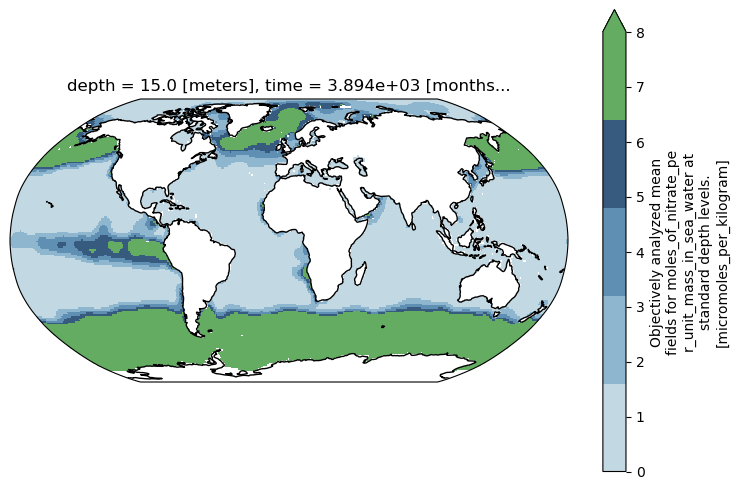

In [12]:
n_an = nit.n_an.sel(depth = 15, method='nearest') #select the depth of nitrate measurements to plot
cmap = mpl.colors.ListedColormap(["#c2d8e2","#8eb6ce", "#5f8fb3", "#375a7f", "#64ac62"])

fig = plt.figure(figsize=(9,6)) # create a sized figure
ax = plt.axes(projection=ccrs.Robinson()) # create figure axes with a projection
ax.set_global() #set the map to be global
ax.coastlines() #add coastlines
#ax.gridlines() #add gridlines
p = n_an.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, vmax=8, cmap=cmap)

fig.savefig('myimage.png', dpi=1200)


In [ ]:
import requests

url = "https://www.ncei.noaa.gov/data/oceans/archive/arc0218/0270533/2.2/data/0-data/nitrate/all/1.00/woa23_all_n00_01.nc"
response = requests.get(url)

if response.status_code == 200:
    print("File is accessible!")
else:
    print(f"Error: {response.status_code}")


File is accessible!
